## Exploratory Data Analysis for PMF Dataset

The following notebook explores the SY 2018-19 Performance Management Framework (PMF) Dataset published by the DC Public Charter School Board (DC PCSB). The analysis and likely model will be limited to schools serving students in grades PK - 8. Additional features may be added in the coming days / weeks. 

In [1]:
import pandas as pd
import seaborn as sns
%matplotlib inline

### Read in Data

In [2]:
pmf_data = pd.read_csv('../pmf-predictions/SY2018-19 Charter Sector PMF Datafile.csv')
pmf_data.head(5)

,School Code,School Name,PMF Score,PMF Tier,Framework,Ward,Asian (%),Black / African American (%),Hispanic (%),Native American (%),...,CLASS: Emotional Support,CLASS: Classroom Organization,CLASS: Instructional Support,Attendance (ISA) (%),Reenrollment Rate (%),PK Literacy (%),PK Math (%),PK Social Emotional Learning (%),K-2 Literacy (%),K-2 Math (%)
0,217,Achievement Preparatory Academy PCS - Wahler P...,60.1%,2.0,PK-8,8,0.0,97.1,1.9,0.5,...,5.9,5.9,3.2,88.8,64.4,96.9,96.1,NaN,NaN,NaN
1,1100,Achievement Preparatory Academy PCS - Wahler P...,35.3%,2.0,PK-8,8,0.0,97.6,0.7,0.4,...,NaN,NaN,NaN,91.3,80.2,NaN,NaN,NaN,NaN,NaN
2,140,AppleTree Early Learning Center PCS - Columbia...,79.8%,1.0,PK Only,1,2.6,59.7,7.1,1.9,...,6.1,6.2,3.6,87.7,NaN,94.5,93.7,82.0,NaN,NaN
3,3072,AppleTree Early Learning Center PCS - Douglas ...,72.3%,1.0,PK Only,8,0.0,97.8,0.0,2.2,...,5.5,5.8,2.9,85.9,NaN,97.3,91.8,94.8,NaN,NaN
4,3073,AppleTree Early Learning Center PCS - Lincoln ...,91.0%,1.0,PK Only,6,5.0,43.3,1.7,1.7,...,6.1,6.3,4.2,92.6,NaN,98.1,98.1,82.8,NaN,NaN


In [3]:
## Set Index to the unique School Codes
pmf_data.set_index('School Code',inplace= True)

In [4]:
##check to make sure dataset is a pandas dataframe
type(pmf_data)

pandas.core.frame.DataFrame

In [5]:
## check the number of rows and columns
pmf_data.shape

(90, 36)

### Columns & Data Types

In [6]:
##print columns
pmf_data.columns
## NOTE: Potential to add additional features once I have a chance to join them to the dataset

Index(['School Name', 'PMF Score', 'PMF Tier', 'Framework', 'Ward',
       'Asian (%)', 'Black / African American (%)', 'Hispanic (%)',
       'Native American (%)', 'Pacific Islander / Native Hawaiian (%)',
       'White (%)', 'Multiracial (%)', 'SPED (%)', 'ELL (%)', 'At Risk (%)',
       'Audited Enrollment (#)', 'Growth Assessment', 'ELA (%)', 'Math (%)',
       'Achievement Assessment', 'ELA Levels 3+ (%)', 'ELA Levels 4+ (%)',
       'Math Levels 3+ (%)', 'Math Levels 4+ (%)',
       'Gateway: 3rd Grade ELA Levels 3+ (%)',
       'Gateway: 8th Grade Math Levels 3+ (%)', 'CLASS: Emotional Support',
       'CLASS: Classroom Organization', 'CLASS: Instructional Support',
       'Attendance (ISA) (%)', 'Reenrollment Rate (%)', 'PK Literacy (%)',
       'PK Math (%)', 'PK Social Emotional Learning (%)', 'K-2 Literacy (%)',
       'K-2 Math (%)'],
      dtype='object')

In [7]:
##Get list of all columns and corresponding data types
pd.DataFrame(pmf_data.dtypes,columns=['Data Types'])

,Data Types
School Name,object
PMF Score,object
PMF Tier,float64
Framework,object
Ward,int64
Asian (%),float64
Black / African American (%),float64
Hispanic (%),float64
Native American (%),float64
Pacific Islander / Native Hawaiian (%),float64


In [8]:
##Remove % from PMF Score Column
pmf_data['PMF Score'] = pmf_data['PMF Score'].str.replace('%','')

In [9]:
##Check to see if replace worked
pmf_data.head(3)

,School Name,PMF Score,PMF Tier,Framework,Ward,Asian (%),Black / African American (%),Hispanic (%),Native American (%),Pacific Islander / Native Hawaiian (%),...,CLASS: Emotional Support,CLASS: Classroom Organization,CLASS: Instructional Support,Attendance (ISA) (%),Reenrollment Rate (%),PK Literacy (%),PK Math (%),PK Social Emotional Learning (%),K-2 Literacy (%),K-2 Math (%)
School Code,,,,,,,,,,,,,,,,,,,,,
217,Achievement Preparatory Academy PCS - Wahler P...,60.1,2.0,PK-8,8,0.0,97.1,1.9,0.5,0.3,...,5.9,5.9,3.2,88.8,64.4,96.9,96.1,NaN,NaN,NaN
1100,Achievement Preparatory Academy PCS - Wahler P...,35.3,2.0,PK-8,8,0.0,97.6,0.7,0.4,0.2,...,NaN,NaN,NaN,91.3,80.2,NaN,NaN,NaN,NaN,NaN
140,AppleTree Early Learning Center PCS - Columbia...,79.8,1.0,PK Only,1,2.6,59.7,7.1,1.9,1.3,...,6.1,6.2,3.6,87.7,NaN,94.5,93.7,82.0,NaN,NaN


In [10]:
## Convert PMF Score to a numeric feature
pmf_data['PMF Score'] = pd.to_numeric(pmf_data['PMF Score'])
pmf_data['PMF Score'].dtypes

dtype('float64')

### Descriptive Stats of PMF Dataset

In [11]:
##key features
pmf_data[['PMF Score','PMF Tier','Ward','SPED (%)','At Risk (%)','ELL (%)','Audited Enrollment (#)','ELA (%)','Math (%)']].describe()

,PMF Score,PMF Tier,Ward,SPED (%),At Risk (%),ELL (%),Audited Enrollment (#),ELA (%),Math (%)
count,90.000000,85.000000,90.000000,90.000000,90.000000,90.000000,90.000000,81.000000,81.000000
mean,64.910000,1.470588,5.733333,15.047778,46.942222,8.538889,341.344444,55.607407,57.259259
std,14.881072,0.502096,1.759724,6.072081,19.968239,13.941569,167.086949,11.035112,17.062684
min,35.300000,1.000000,1.000000,4.200000,6.300000,0.000000,54.000000,33.400000,27.600000
25%,52.975000,1.000000,5.000000,11.075000,33.125000,0.600000,229.250000,47.800000,44.700000
50%,65.250000,1.000000,6.000000,14.800000,50.400000,1.950000,335.500000,53.700000,52.500000
75%,77.400000,2.000000,7.000000,18.950000,61.375000,11.850000,412.750000,62.000000,65.400000
max,91.200000,2.000000,8.000000,39.100000,80.000000,82.300000,1061.000000,96.000000,99.000000


In [12]:
## All Features
pmf_data.describe()

,PMF Score,PMF Tier,Ward,Asian (%),Black / African American (%),Hispanic (%),Native American (%),Pacific Islander / Native Hawaiian (%),White (%),Multiracial (%),...,CLASS: Emotional Support,CLASS: Classroom Organization,CLASS: Instructional Support,Attendance (ISA) (%),Reenrollment Rate (%),PK Literacy (%),PK Math (%),PK Social Emotional Learning (%),K-2 Literacy (%),K-2 Math (%)
count,90.000000,85.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.00000,...,58.000000,58.000000,58.000000,90.00000,79.000000,58.000000,58.000000,19.000000,37.000000,38.000000
mean,64.910000,1.470588,5.733333,0.921111,77.397778,10.903333,0.282222,0.105556,7.745556,2.64000,...,5.912069,6.136207,3.448276,92.57000,83.916456,92.003448,89.432759,87.552632,52.721622,55.197368
std,14.881072,0.502096,1.759724,1.759373,26.338249,15.879330,0.486810,0.226533,13.312537,3.92359,...,0.309543,0.241848,0.535819,2.56666,7.437525,8.152622,14.743436,12.504460,16.151266,19.956175
min,35.300000,1.000000,1.000000,0.000000,17.200000,0.000000,0.000000,0.000000,0.000000,0.00000,...,5.200000,5.600000,2.500000,83.10000,64.400000,65.200000,0.000000,60.900000,25.000000,17.000000
25%,52.975000,1.000000,5.000000,0.000000,52.875000,1.625000,0.000000,0.000000,0.000000,0.00000,...,5.700000,6.000000,3.100000,91.62500,78.950000,88.625000,85.775000,79.150000,40.000000,41.750000
50%,65.250000,1.000000,6.000000,0.150000,92.900000,4.100000,0.000000,0.000000,0.400000,0.45000,...,5.900000,6.100000,3.300000,92.80000,84.800000,94.950000,94.200000,94.400000,54.300000,58.550000
75%,77.400000,2.000000,7.000000,1.175000,97.450000,10.325000,0.375000,0.075000,9.125000,4.37500,...,6.100000,6.300000,3.800000,94.07500,89.650000,97.950000,97.825000,97.350000,63.600000,68.725000
max,91.200000,2.000000,8.000000,9.800000,100.000000,74.200000,2.200000,1.300000,48.300000,20.70000,...,6.500000,6.700000,4.700000,99.70000,97.100000,100.000000,100.000000,100.000000,86.000000,95.000000


#### Notes and observations

- There are 90 rows of data but only 85 have a PMF Tier. This means 5 schools were scored but not tiered in SY 2018-19. Schools in their first or last year of operation generally do not receive a corresponding Tier.
- The average Ward for the PK-8 schools is 5.7 which corresponds to my intuition. A plurality, if not majority, of public charter schools in DC are located in Wards 5 and 6.
- Whil each school's population is unique, the average population is 8.5% English Language Learners, 15.0% have a disability, and 46.9% are considered at-risk. 
- The median school size is 335 students.
- On student growth measures of ELA and Math, 53.7% and 52.5%, respectively, are meeting growth expectations as evidenced by the median value.

### Missing Data
Grade configurations of each campus define what measures are in place for each school. Schools serving PK students, for example, receive a CLASS score but others do not. PK only schools also do not receive a reenrollment rate. Other examples include: K-2 students do not take the state assessment, new schools do not receive a Tier in their first year, and 3rd Graders / 8th Graders are the only students scored on "Gateway Achievement" measures. Some of this data can't just be filled in using the average. I will need to figure out how to model with missing data being an acceptable choice. 

In [13]:
##view where most data is null
pmf_data.isnull()

,School Name,PMF Score,PMF Tier,Framework,Ward,Asian (%),Black / African American (%),Hispanic (%),Native American (%),Pacific Islander / Native Hawaiian (%),...,CLASS: Emotional Support,CLASS: Classroom Organization,CLASS: Instructional Support,Attendance (ISA) (%),Reenrollment Rate (%),PK Literacy (%),PK Math (%),PK Social Emotional Learning (%),K-2 Literacy (%),K-2 Math (%)
School Code,,,,,,,,,,,,,,,,,,,,,
217,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True
1100,False,False,False,False,False,False,False,False,False,False,...,True,True,True,False,False,True,True,True,True,True
140,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,True
3072,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,True
3073,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
270,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
263,False,False,False,False,False,False,False,False,False,False,...,True,True,True,False,False,True,True,True,True,True


In [14]:
pmf_data.isnull().sum()

School Name                                0
PMF Score                                  0
PMF Tier                                   5
Framework                                  0
Ward                                       0
Asian (%)                                  0
Black / African American (%)               0
Hispanic (%)                               0
Native American (%)                        0
Pacific Islander / Native Hawaiian (%)     0
White (%)                                  0
Multiracial (%)                            0
SPED (%)                                   0
ELL (%)                                    0
At Risk (%)                                0
Audited Enrollment (#)                     0
Growth Assessment                          8
ELA (%)                                    9
Math (%)                                   9
Achievement Assessment                    16
ELA Levels 3+ (%)                         16
ELA Levels 4+ (%)                         16
Math Level

### Group By Frameworks and Wards
PK Only (8 total) schools have a higher overall PMF score than PK-8 (82 total) schools. Schools in Ward 1 have an average PMF score that is below 60.0% -- the only Ward in DC this true for. 

In [15]:
pmf_data[['Framework','PMF Score']].groupby('Framework').mean()

,PMF Score
Framework,
PK Only,75.837500
PK-8,63.843902


In [16]:
pmf_data[['Ward','PMF Score']].groupby('Ward').mean()

,PMF Score
Ward,
1,58.550000
2,84.300000
4,63.014286
5,67.250000
6,66.258333
7,62.316667
8,65.317647


In [17]:
##only one campus in Ward 2 so the average is actually just one school
pmf_data['Ward'].value_counts()

5    24
7    18
8    17
4    14
6    12
1     4
2     1
Name: Ward, dtype: int64

In [18]:
pmf_data['Framework'].value_counts()

PK-8       82
PK Only     8
Name: Framework, dtype: int64

## Data Visualizations

### Distributions

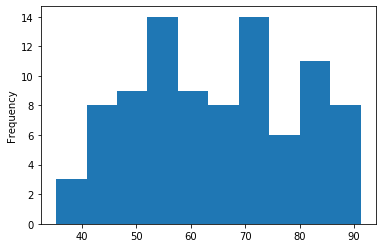

In [19]:
#PMF Scores (doesn't appear to be a normal dist)
pmf_data['PMF Score'].plot(kind='hist',bins = 10);

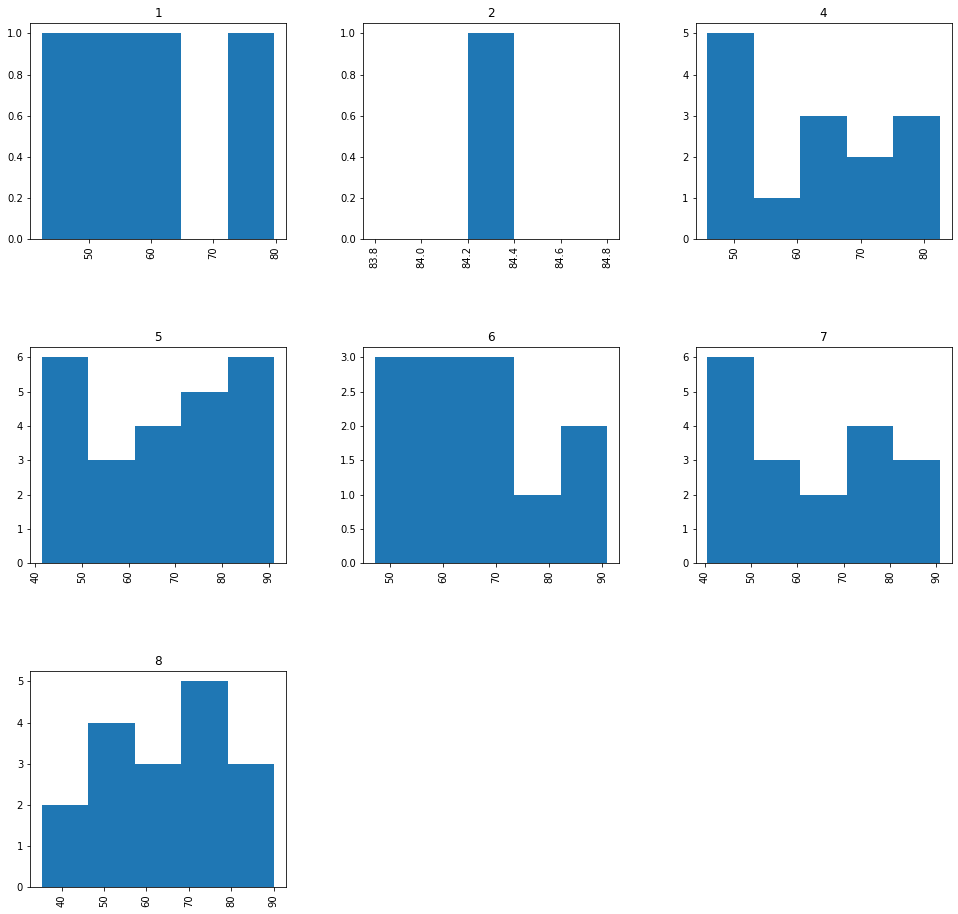

In [20]:
pmf_data.hist(column='PMF Score',by='Ward',figsize=(16,16),bins = 5);

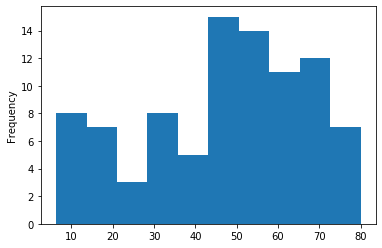

In [21]:
# % of students who are at-risk and their performance on the framework is a common discussion at DC PCSB
pmf_data['At Risk (%)'].plot(kind='hist',bins= 10);

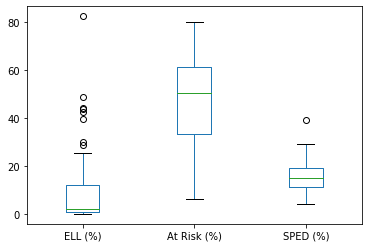

In [22]:
##Check for outliers of special populations
special_pops = ['ELL (%)','At Risk (%)','SPED (%)']
pmf_data[special_pops].plot(kind='box');

### Correlations
In the following cells, I explore the correlation of different features in the dataset. Again, a particular concern is the at-risk special population. Maintaining a framework that isn't "biased" against any particular group of students is of utmost importance to the organization.

In [ ]:
## View the percent of students at-risk and the campus PMF score on a scatter plot
pmf_data.plot(kind='scatter',x='At Risk (%)',y = 'PMF Score');

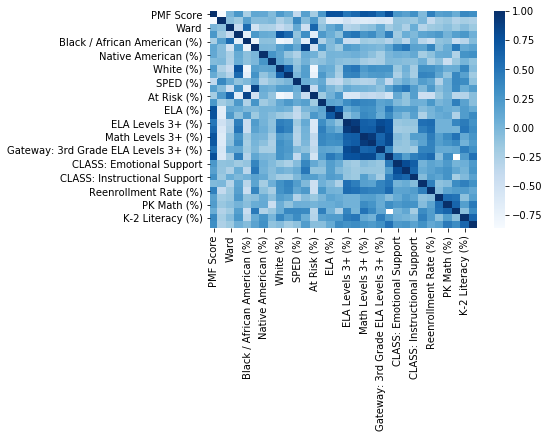

In [28]:
##This plot has too many features

pmf_data_correlations = pmf_data.corr();
sns.heatmap(pmf_data_correlations,cmap='Blues');

In [29]:
#narrow features
features = ['PMF Score','At Risk (%)','SPED (%)','ELL (%)','Ward','ELA Levels 3+ (%)',
           'Math Levels 3+ (%)','ELA Levels 4+ (%)','Math Levels 4+ (%)']

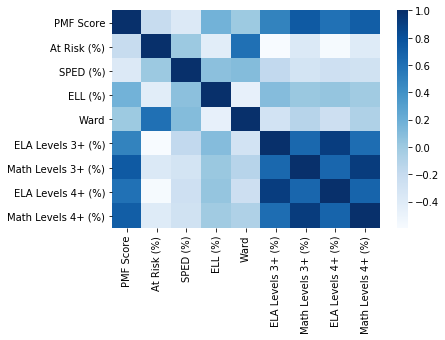

In [31]:
pmf_data_correlations = pmf_data[features].corr()
sns.heatmap(pmf_data_correlations, cmap = 'Blues')

### Summary

#### Shortcomings / Assumptions
One issue I am going to have to solve for is the natural tendency for this dataset to have null values. For example, there are 71 rows with no value for PK Social Emotional (%) because only schools with 1) a PK program and 2) a social emotional PK component give these assessments. I could remove PK Only schools from the analysis but I think there's a better way to solve for the issuse. 

Also, because this framework score is by nature aggregated based on the performance on each of the individual measures, all measures theoretically will have a high correlation with the actual score. I need to figure out if this is a problem or not. 

#### Next Steps
The next steps are to solve for the null values, add in additonal features I think are relevant, and decide whether or not to pull in historical data prior to SY 2018-19 for the model. 

